In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

* `%matplotlib inline` é um comando especial que garante que os gráficos criados com o Matplotlib sejam exibidos diretamente no notebook que você está usando, em vez de abrir uma janela separada para eles.

* `mpl.style.use('ggplot')` define o estilo padrão do Matplotlib para ser o estilo 'ggplot', o que torna os gráficos mais semelhantes aos que você pode ver na popular ferramenta de visualização de dados.

* `plt.style.use('fivethirtyeight')` define o estilo do pyplot do Matplotlib como 'fivethirtyeight', que é um estilo que faz com que os gráficos pareçam semelhantes aos os que você pode ver no site de notícias, FiveThirtyEight.

* `sns.set(context='notebook', palette='dark', color_codes=True)` define algumas configurações padrão para a biblioteca Seaborn. Especificamente, ela define o 'contexto' do Seaborn como 'notebook', o que significa que os gráficos serão otimizados para exibição em um notebook Jupyter. Ela também define a 'paleta' como 'escura', o que significa que as cores padrão usadas nas plotagens serão mais escuras. Por fim, ele define 'color_codes' como 'True', o que permite que você use nomes de cores em seu código em vez de especificar valores RGB para cada cor.

# Abrindo o dataset

In [2]:
data = pd.read_csv("data/dataset.csv")
data.head(1)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic


***Obs***: A coluna *"Unnamed: 0"* é criada pelo pandas quando nenhum cabeçalho é fornecido ou quando há uma coluna adicional de índice de linha sem nome no arquivo CSV. Para evitar que a coluna *"Unnamed: 0"* apareça ao ler um arquivo CSV com o pandas, você pode especificar qual coluna é o índice do DataFrame usando o parâmetro `index_col` da função `read_csv()`

In [3]:
data = pd.read_csv("data/dataset.csv", index_col = 0)
data.head(1)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic


# Conhecendo o dataset

In [4]:
# Dimensões do dataset: quantidade de exemplos e quantidade de atributos 
data.shape

(114000, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [40]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [49]:
print(data["track_genre"].unique())
print("\nQuantidade de generos diferentes: {}".format(len(data["track_genre"].unique())))

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

## Análise estatística

In [5]:
# descrição SOMENTE dos atributos numéricos
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [15]:
print("QUANTIDADE DE ARTISTAS ÚNICOS:")
print(data["artists"].unique().shape)
print("\nCONTAGEM DE MÚSICAS POR ARTISTAS:")
print(data["artists"].value_counts())

QUANTIDADE DE ARTISTAS ÚNICOS:
(31438,)

CONTAGEM DE MÚSICAS POR ARTISTAS:
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: artists, Length: 31437, dtype: int64


In [24]:
print(data["album_name"].unique().shape)

(46590,)


## Checando se existem valores NaN, Null ou None

In [107]:
(data.isnull().sum()).sort_values(ascending=False)

album_name          1
track_name          1
artists             1
track_id            0
speechiness         0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
loudness            0
mode                0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_genre         0
dtype: int64

In [108]:
#função que gera uma gráfico de barras com colunas e frequência dos dados faltantes.
def missing_visualization(dataframe):
  quant_isnull = dataframe.isnull().sum()
  columns = dataframe.columns
  dic = {"colunas":[],"Quantidade de nulos":[]}
  for coluna,quant in zip(columns,quant_isnull):
    if quant > 0:
      dic["colunas"].append(quant)
      dic["Quantidade de nulos"].append(coluna)
  df = pd.DataFrame(dic)
  plt.figure(figsize=(15,5))
  sns.barplot(x=df["Quantidade de nulos"],y=df["colunas"],data=df, palette="rocket")
  plt.xticks(rotation=45);

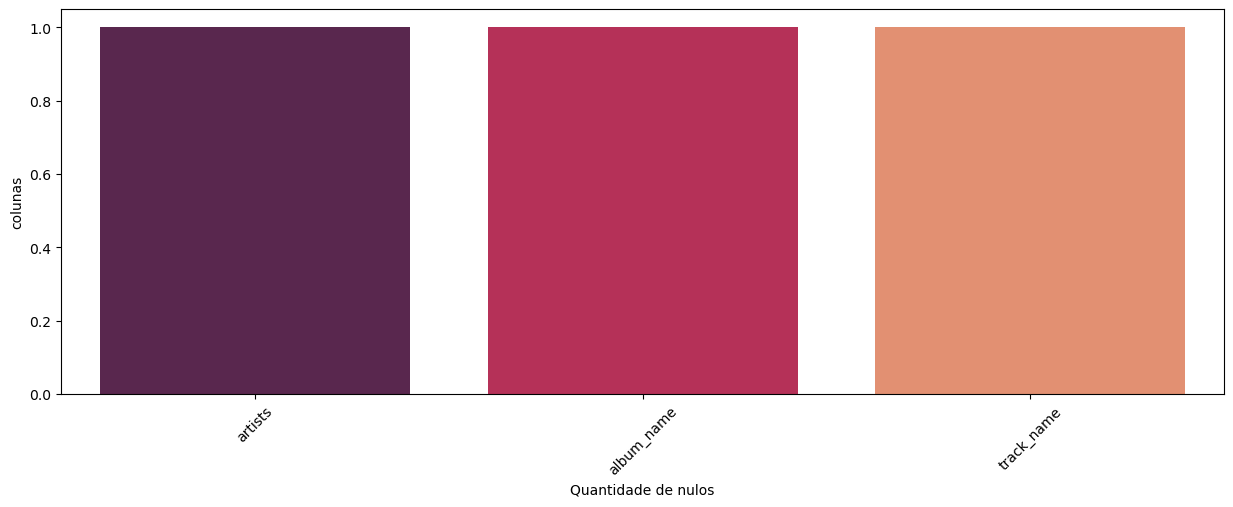

In [109]:
missing_visualization(data)

In [117]:
data.dropna(inplace=True)

# Respondendo perguntas sobre o dataset

In [50]:
# As 10 músicas mais populares
popular_df = data.sort_values('popularity', ascending = False).head(10) # head(100) para pegar somente os 100 primeiros
popular_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latino
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latin


In [6]:
#Artistas mais populares

# Seleciona somente a coluna 'artists' e 'popularity' e cria um novo dataframe
popular_artists = data[["artists", "popularity"]]
popular_artists = popular_artists.groupby("artists").count().sort_values(by='popularity', ascending=False).reset_index()
popular_artists

,artists,popularity
0,The Beatles,279
1,George Jones,271
2,Stevie Wonder,236
3,Linkin Park,224
4,Ella Fitzgerald,222
...,...,...
31432,Mother Love Bone,1
31433,DubVision;Afrojack,1
31434,Dub Pistols;Too Many T's,1
31435,Mothership,1


* `popular_artists.groupby("artists").mean()`: agrupa o dataFrame pela coluna "artists" usando o método groupby. Em seguida, aplica a média para calcular a pontuação média de popularidade de cada artista. O DataFrame resultante tem uma linha por artista e uma coluna para a pontuação média de popularidade.
* `.sort_values(by='popularity', ascending=False).reset_index()`: ordena o dataframe da maior popularidade (média) para a menor. `reset_index()` redefine o índice do dataframe para um índice inteiro simples, criando uma nova coluna no dataframe que contém os valores de índice originais antes da redefinição.

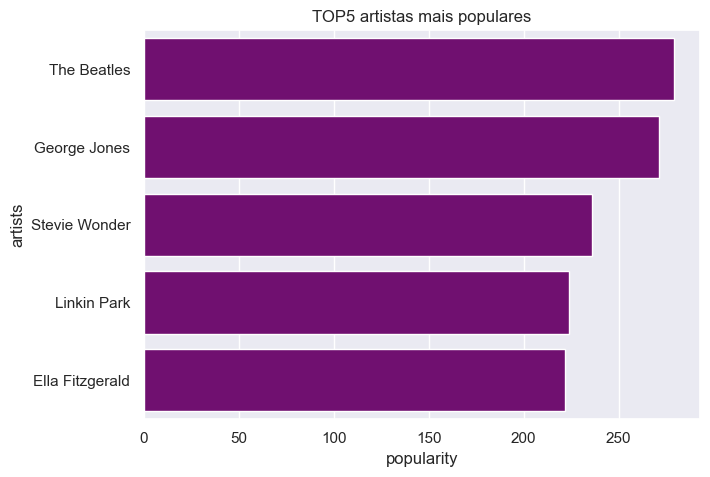

In [7]:
sns.barplot(x="popularity", y="artists", data=popular_artists[:5], color="purple")
plt.title("TOP5 artistas mais populares")
plt.show()

In [79]:
genres = data[["track_genre", "popularity"]]
genres = genres.sort_values(by='popularity', ascending=False)[:5]
genres

,track_genre,popularity
20001,dance,100
81051,pop,100
51664,hip-hop,99
81210,pop,98
89411,reggaeton,98


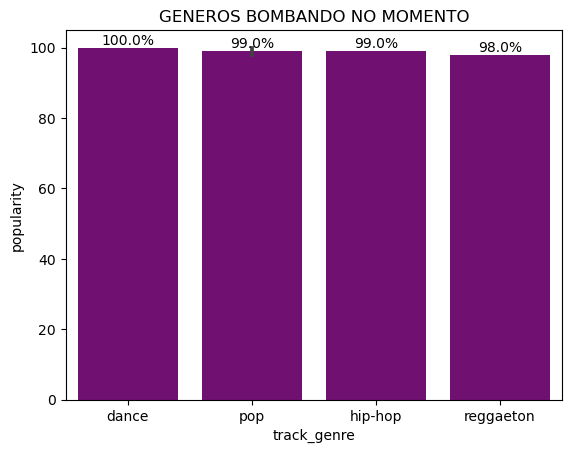

In [92]:
plt.title("GENEROS BOMBANDO NO MOMENTO")

ax = sns.barplot(x="track_genre", y="popularity", data=genres, color="purple")
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom')
plt.show()

# Correlação de Pearson

In [97]:
corr_table = data.corr(method="pearson")

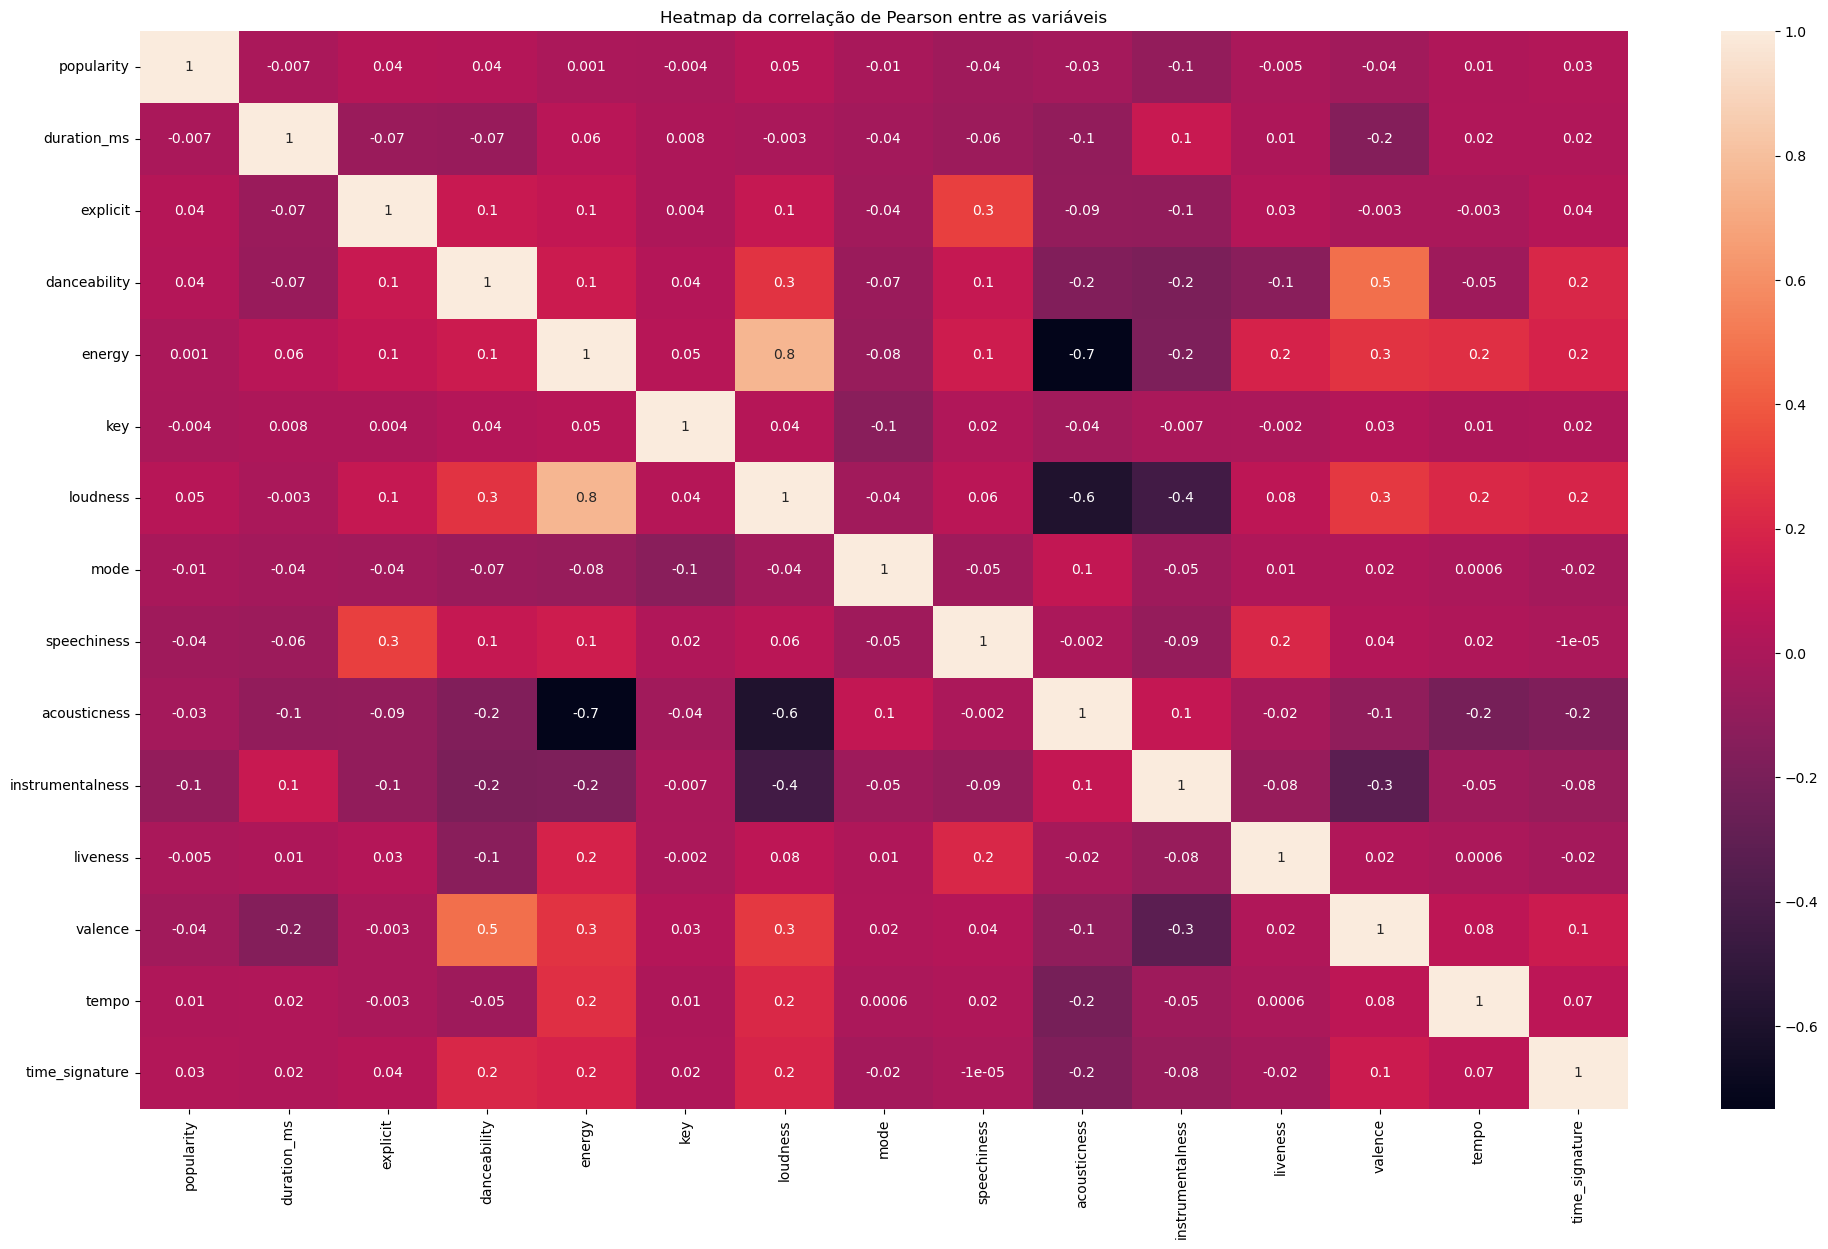

In [113]:
plt.figure(figsize=(24,14))
sns.heatmap(corr_table, annot=True, fmt=".1g")
plt.title("Heatmap da correlação de Pearson entre as variáveis")
plt.show() #mostrando o plot

`loudness` e `energy` tem uma correlação positiva, ou seja, quando uma aumenta a outra também aumenta. 

`valence` e `danceability` também tem uma correlação notável, apesar de não tão forte. Valência se refere a qualidade emocional ou o "mood" da música, quando mais alto melhor o mood e quanto mais baixo "pior".

## Salvando dataset alterado

In [118]:
data.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [119]:
data.shape

(113999, 20)

In [120]:
data.to_csv("data/dataset-tratado.csv")